In [1]:
import pickle
import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import FastICA
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import nibabel as nib
import ants
from scipy.ndimage.morphology import binary_erosion
from scipy.ndimage.morphology import binary_dilation
import cv2
import bigbadbrain as bbb
import scipy
from scipy.interpolate import interp1d
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors
import matplotlib
import tqdm
import brainsss

/home/users/brezovec/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning: Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function
  "Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function"


In [2]:
fixed_path = "/oak/stanford/groups/trc/data/Yukun/registration/mean_brain/FDA_downsampled_flip.nii"
fixed = ants.image_read(fixed_path)
fixed.set_spacing((.76,.76,.76))
fixed

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (826, 384, 240)
	 Spacing    : (0.76, 0.76, 0.76)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [4]:
moving_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230124_DSX_meanbrain/murthy_hybrid/syn_5.nii"
moving = ants.image_read(moving_path)
moving.set_spacing((.49,.49,1))#(.76,.76,1))
moving

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (1024, 512, 299)
	 Spacing    : (0.49, 0.49, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [44]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230124_DSX_meanbrain/clandinin/clanDSXmean-to-FDA.nii"
temp = ants.image_read(file)

In [20]:
warped = ants.registration(fixed,moving,'SyN')

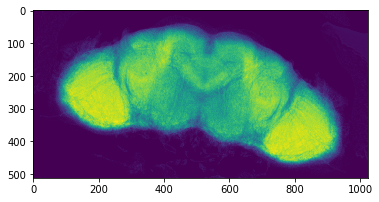

In [5]:
plt.imshow(moving[:,:,100].T)

In [6]:
os.listdir("/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230127_DSX_to_local/murthy")

['220605_dsx_vol3_local_atlas_red-to-localmean_syn5.nii',
 '220422_dsx_vol1_local_atlas_red-to-localmean_syn5.nii',
 '220605_dsx_vol3_local_atlas_green-to-localmean_syn5.nii',
 '220616_dsx_vol1_local_atlas_green-to-localmean_syn5.nii',
 '220616_dsx_vol2_local_atlas_green-to-localmean_syn5.nii',
 '220616_dsx_vol2_local_atlas_red-to-localmean_syn5.nii',
 '220408_dsx_vol1_local_atlas_green-to-localmean_syn5.nii',
 '220616_dsx_vol1_local_atlas_red-to-localmean_syn5.nii',
 '220605_dsx_vol2_local_atlas_green-to-localmean_syn5.nii',
 '221108_dsx_vol1_local_atlas_red-to-localmean_syn5.nii',
 '220408_dsx_vol1_local_atlas_red-to-localmean_syn5.nii',
 '220604_dsx_vol1_local_atlas_red-to-localmean_syn5.nii',
 '220604_dsx_vol1_local_atlas_green-to-localmean_syn5.nii',
 '221108_dsx_vol1_local_atlas_green-to-localmean_syn5.nii',
 '220422_dsx_vol1_local_atlas_green-to-localmean_syn5.nii',
 '220605_dsx_vol2_local_atlas_red-to-localmean_syn5.nii']

In [8]:
path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230127_DSX_to_local/murthy"
brains = []
for file in os.listdir(path):
    if 'red' in file:
        continue
    brains.append(ants.image_read(os.path.join(path, file)).numpy())
    print(file)

220605_dsx_vol3_local_atlas_green-to-localmean_syn5.nii
220616_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
220616_dsx_vol2_local_atlas_green-to-localmean_syn5.nii
220408_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
220605_dsx_vol2_local_atlas_green-to-localmean_syn5.nii
220604_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
221108_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
220422_dsx_vol1_local_atlas_green-to-localmean_syn5.nii


In [9]:
brains = np.asarray(brains)

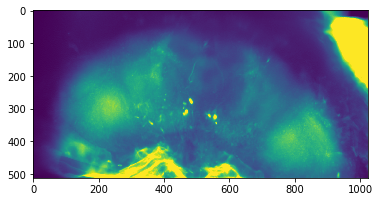

In [19]:
plt.imshow(np.mean(brains[:,:,:,50:],axis=(0,3)).T,vmax=100)

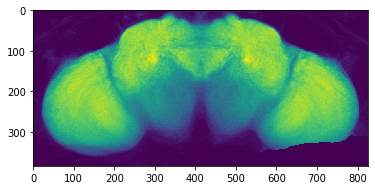

In [24]:
plt.imshow(warped['warpedmovout'][:,:,100].T)

In [23]:
os.mkdir("/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230127_DSX_local_to_FDA/murthy")

In [25]:
# mimic_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230127_DSX_to_local/clandinin"
# save_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230127_DSX_local_to_FDA/clandinin"
mimic_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230127_DSX_to_local/murthy"
save_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230127_DSX_local_to_FDA/murthy"


for file in os.listdir(mimic_path):
    print(file)
    mimic = ants.image_read(os.path.join(mimic_path, file))
    mimic.set_spacing((.49,.49,1))#(.76,.76,1))
    moco = ants.apply_transforms(fixed,mimic,warped['fwdtransforms'])
    save_file = os.path.join(save_path,file)
    nib.Nifti1Image(moco.numpy(), np.eye(4)).to_filename(save_file)

220605_dsx_vol3_local_atlas_red-to-localmean_syn5.nii
220422_dsx_vol1_local_atlas_red-to-localmean_syn5.nii
220605_dsx_vol3_local_atlas_green-to-localmean_syn5.nii
220616_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
220616_dsx_vol2_local_atlas_green-to-localmean_syn5.nii
220616_dsx_vol2_local_atlas_red-to-localmean_syn5.nii
220408_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
220616_dsx_vol1_local_atlas_red-to-localmean_syn5.nii
220605_dsx_vol2_local_atlas_green-to-localmean_syn5.nii
221108_dsx_vol1_local_atlas_red-to-localmean_syn5.nii
220408_dsx_vol1_local_atlas_red-to-localmean_syn5.nii
220604_dsx_vol1_local_atlas_red-to-localmean_syn5.nii
220604_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
221108_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
220422_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
220605_dsx_vol2_local_atlas_red-to-localmean_syn5.nii


In [106]:
path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230127_DSX_local_to_FDA/murthy"
brains = []
for file in os.listdir(path):
    if 'red' in file:
        continue
    brains.append(ants.image_read(os.path.join(path, file)).numpy())
    print(file)

220605_dsx_vol3_local_atlas_green-to-localmean_syn5.nii
220616_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
220616_dsx_vol2_local_atlas_green-to-localmean_syn5.nii
220408_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
220605_dsx_vol2_local_atlas_green-to-localmean_syn5.nii
220604_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
221108_dsx_vol1_local_atlas_green-to-localmean_syn5.nii
220422_dsx_vol1_local_atlas_green-to-localmean_syn5.nii


In [107]:
brains=np.asarray(brains)
brains.shape

(8, 826, 384, 240)

In [121]:
413-250

163

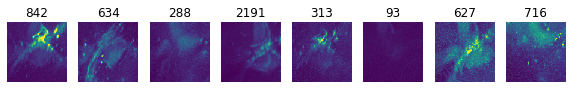

In [124]:
plt.figure(figsize=(10,10))
vmaxs = [500,500,500,3000,300,500,500,500]
for i in range(8):
    plt.subplot(1,8,i+1)
    image = np.max(brains[i,250+220:350+220,50:150,100:150],axis=2).T
    plt.imshow(image,vmax=vmaxs[i])
    plt.axis('off')
    plt.title(int(np.max(image)))
    
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

In [72]:
out = np.mean(brains_red[:,:,:,100:200],axis=0)
out = np.max(out,axis=2)

In [65]:
out = np.max(brains[:,:,:,100:200],axis=(0,3))

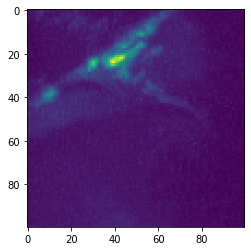

In [57]:
plt.imshow(np.max(brains[5,250:350,50:150,100:150],axis=2))

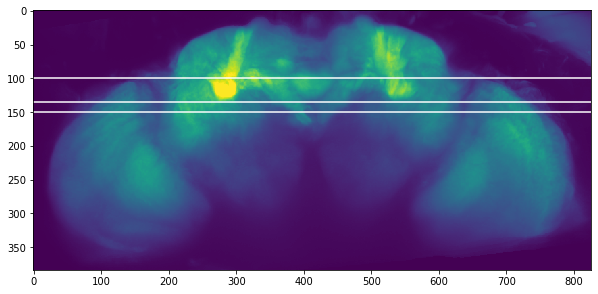

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(out.T,vmax=8000)
plt.axhline(100,color='w')
plt.axhline(135,color='w')
plt.axhline(150,color='w')

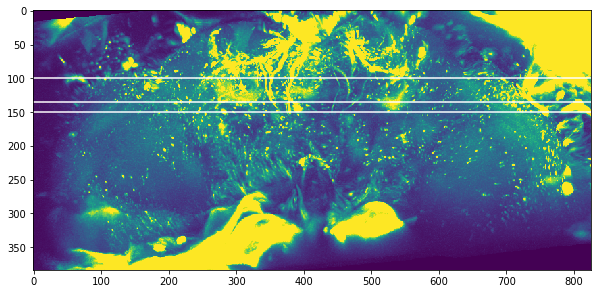

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(out.T,vmax=1000)
plt.axhline(100,color='w')
plt.axhline(135,color='w')
plt.axhline(150,color='w')

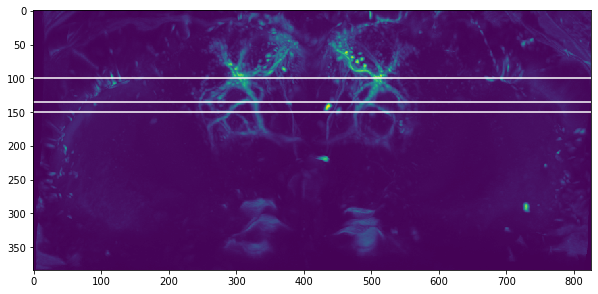

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(out.T)
plt.axhline(100,color='w')
plt.axhline(135,color='w')
plt.axhline(150,color='w')

# align murthy local DSX hybrid to FDA

In [53]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230124_DSX_meanbrain/murthy_hybrid/syn_5.nii"
moving = ants.image_read(file)
moving.set_spacing((.76,.76,1))

In [54]:
file = "/oak/stanford/groups/trc/data/Yukun/registration/mean_brain/FDA_downsampled_flip.nii"
fixed = ants.image_read(file)
fixed.set_spacing((.76,.76,.76))

In [56]:
out = ants.registration(fixed,moving,'SyN')

In [76]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230124_DSX_meanbrain/murthy_hybrid/murthyDSXmeansyn5-to-FDA.nii"
nib.Nifti1Image(out['warpedmovout'].numpy(), np.eye(4)).to_filename(save_file)

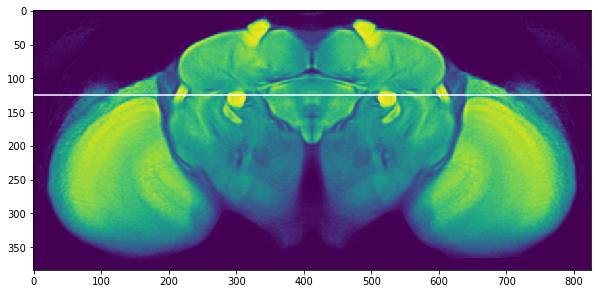

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(fixed[:,:,110].T)
plt.axhline(125,color='w')

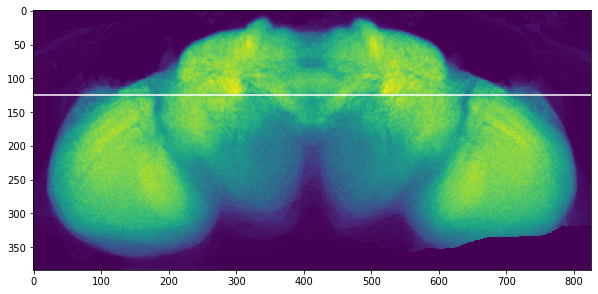

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(out['warpedmovout'][:,:,110].T)
plt.axhline(125,color='w')